Data Modeling and Evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

desc_features = ['Sales', 'Quantity', 'Discount', 'Profit']
target_feature = 'Category'
target_levels = []
col = pd.read_excel('DataPostProcess.xlsx', nrows=0).columns
df = pd.read_excel('DataPostProcess.xlsx', names = col, index_col='Row ID')
df.head()


,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,
1,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,0.495626,0.276251,0.000000,0.703753
2,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.009605,0.138125,0.000000,0.476751
3,CA-2016-138688,DV-13045,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,0.648507,0.552502,0.790713,0.060651
4,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,0.014855,0.138125,0.351428,0.472103
5,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,0.032804,0.828753,0.000000,0.484539


Testing and Training

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[desc_features], df[target_feature], test_size=0.25)
display(X_train, X_test, Y_train, Y_test)

,Sales,Quantity,Discount,Profit
Row ID,,,,
6377,0.009700,0.138125,0.000000,0.473986
598,0.007580,0.138125,0.351428,0.470504
2038,0.007797,0.276251,0.351428,0.474041
9044,0.003754,0.138125,0.351428,0.471812
2635,0.004598,0.552502,1.000000,0.463245
...,...,...,...,...
5210,0.314882,0.276251,0.000000,0.598491
1103,0.001687,0.276251,1.000000,0.464095
7100,0.015603,0.276251,0.351428,0.478811


,Sales,Quantity,Discount,Profit
Row ID,,,,
3304,0.008496,0.276251,0.351428,0.474441
6309,0.426003,0.966878,0.351428,0.712821
1560,0.012505,0.690627,0.000000,0.479099
1686,0.004793,0.138125,1.000000,0.463267
8831,0.026774,0.138125,0.000000,0.484770
...,...,...,...,...
8165,0.007797,0.276251,0.351428,0.473882
8614,0.004699,0.138125,0.000000,0.473119
2996,0.016567,0.414376,0.351428,0.478385


Row ID
6377    Office Supplies
598           Furniture
2038    Office Supplies
9044         Technology
2635          Furniture
             ...       
5210    Office Supplies
1103    Office Supplies
7100    Office Supplies
1300    Office Supplies
7453         Technology
Name: Category, Length: 7495, dtype: object

Row ID
3304    Office Supplies
6309          Furniture
1560    Office Supplies
1686    Office Supplies
8831    Office Supplies
             ...       
8165    Office Supplies
8614         Technology
2996    Office Supplies
7771    Office Supplies
1726    Office Supplies
Name: Category, Length: 2499, dtype: object

Determine if sampling is needed by seeing how much data is each class in our target feature.

In [30]:
df.groupby('Category').count()

,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,,
Furniture,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
Office Supplies,6026,6026,6026,6026,6026,6026,6026,6026,6026,6025,6025,6025,6025
Technology,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847


As there is an uneven distribution in our dataset as Office Supplies are a majority we will be sampling with sklearns class_weight.

# Evaluation methods: 
- Information-Based Learning 
  - Decision Tree
- Similarity-Based Learning
  - Weighted KNN
- Probability-Based Learning
  - Naive Bayes, and Gaussian Naive Bayes.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Decision Tree
Utilizing the gini criterion as it is computationally less expensive, and roughly the same accuracy as entropy.

In [63]:
clf = DecisionTreeClassifier(max_depth = 13, criterion = 'gini', random_state=0, class_weight = 'balanced')
clf.fit(X_train,Y_train)
display(clf.fit)
y_pred = clf.predict(X_test)
display(y_pred)
print("Accuracy is")
accuracy = accuracy_score(Y_test, y_pred)
display(accuracy)
print("Error rate is")
display(1-accuracy)
cm = confusion_matrix(Y_test, y_pred, labels = ["Technology", "Office Supplies", "Furniture"])
cm_df = pd.DataFrame(cm, columns = ["Technology", "Office Supplies", "Furniture"], index = ["Technology", "Office Supplies", "Furniture"])
display(cm_df)

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=0)>

array(['Office Supplies', 'Office Supplies', 'Office Supplies', ...,
       'Office Supplies', 'Technology', 'Office Supplies'], dtype=object)

Accuracy is


0.5154061624649859

Error rate is


0.48459383753501406

,Technology,Office Supplies,Furniture
Technology,62,355,39
Office Supplies,180,1182,134
Furniture,47,456,44


# KNN 

In [72]:
results = pd.DataFrame(columns=['K-Value', 'Training Accuracy', 'Testing Accuracy'])

for kvalue in range (1,151):
    knc = KNeighborsClassifier(n_neighbors=kvalue, metric='euclidean')
    #fits the training data to the model
    knc.fit(X_train, Y_train)
    #makes predictions based on X data
    train_pred = knc.predict(X_train)
    target_pred = knc.predict(X_test)
    #stores results in a dataframe
    results.loc[kvalue] = [kvalue, accuracy_score(Y_train, train_pred), accuracy_score(Y_test, target_pred)]
display(results.loc[results['Testing Accuracy'].idxmax()])

K-Value              4.000000
Training Accuracy    0.638030
Testing Accuracy     0.409764
Name: 4, dtype: float64

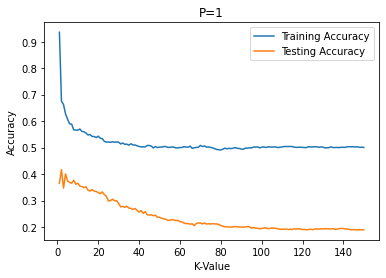

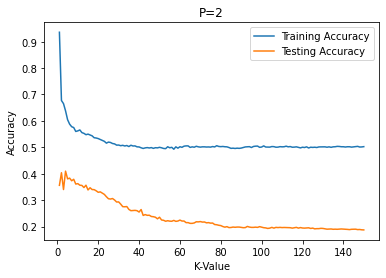

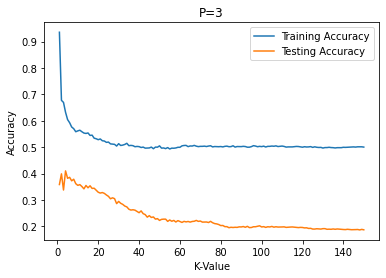

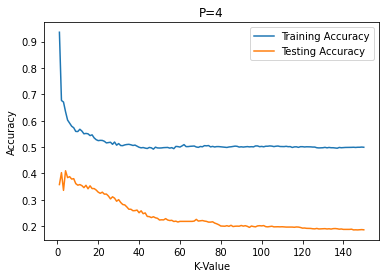

In [73]:
def minkowski_knn(pvalue):
    results = pd.DataFrame(columns=['K-Value', 'Training Accuracy', 'Testing Accuracy'])
    for kvalue in range (1,151):
        knc = KNeighborsClassifier(n_neighbors=kvalue, metric='minkowski', p=pvalue)
        #fits the training data to the model
        knc.fit(X_train, Y_train)
        #makes predictions based on X data
        train_pred = knc.predict(X_train)
        target_pred = knc.predict(X_test)
        #stores results in a dataframe
        results.loc[kvalue] = [kvalue, accuracy_score(Y_train, train_pred), accuracy_score(Y_test, target_pred)]
    #plots the accuracy scores
    results.pop('K-Value')
    results.plot(xlabel='K-Value', ylabel='Accuracy').set_title("P="+str(pvalue))
    plt.show()
#calls function for each p value
for pvalue in range (1,5):
   minkowski_knn(pvalue)

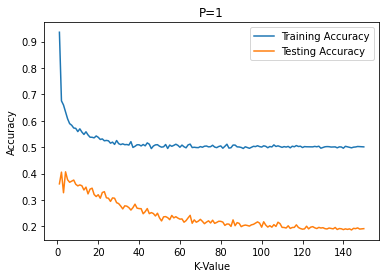

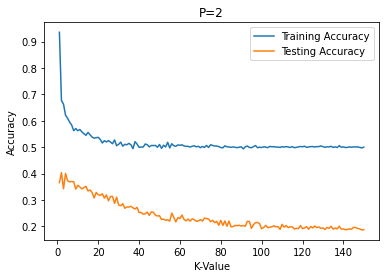

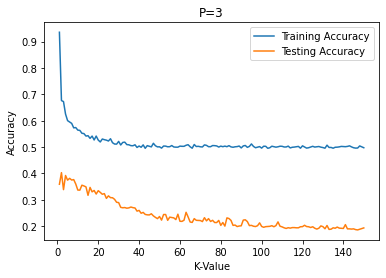

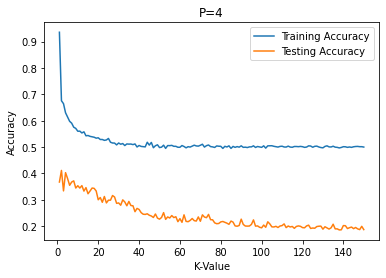

In [76]:
def minkowski_knn(pvalue):
    results = pd.DataFrame(columns=['K-Value', 'Training Accuracy', 'Testing Accuracy'])
    for kvalue in range (1,151):
        knc = KNeighborsClassifier(n_neighbors=kvalue, metric='wminkowski', p=pvalue, metric_params={'w': np.random.random(X_train.shape[1])})
        #fits the training data to the model
        knc.fit(X_train, Y_train)
        #makes predictions based on X data
        train_pred = knc.predict(X_train)
        target_pred = knc.predict(X_test)
        #stores results in a dataframe
        results.loc[kvalue] = [kvalue, accuracy_score(Y_train, train_pred), accuracy_score(Y_test, target_pred)]
    #plots the accuracy scores
    results.pop('K-Value')
    results.plot(xlabel='K-Value', ylabel='Accuracy').set_title("P="+str(pvalue))
    plt.show()
#calls function for each p value
for pvalue in range (1,5):
   minkowski_knn(pvalue)

# Naive Bayes 

In [87]:
gaus = GaussianNB()
gaus.fit(X_train,Y_train)
target_pred = gaus.predict(X_test)
print("Accuracy score: "+str(accuracy_score(Y_test,target_pred)))
#The Gaussian model is better as it has a higher accuracy score, as well as having a faster run time in this instance by .1 seconds on my machine. 

/Users/amandeep/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').